In [ ]:
#!/usr/bin/env python
# coding: utf-8

# Part I - Visualising Football Trends <br>
## by Andy Swan<br>
<br>
## Introduction<br>
I will be analysing the FIFA 21 players dataset set, and will be creating graphs and plots to visualise trends betweens the different variables.<br>
<br>
<br>
<br>
## Preliminary Wrangling<br>


In[43]:

import all packages and set plots to be embedded inline

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
get_ipython().run_line_magic('matplotlib', 'inline')

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.<br>


In[44]:

In [14]:
df = pd.read_csv('players_21.csv')

### What is the structure of your dataset?<br>
The dataset has 18944 rows and 106 columns. However, I will be removing the columns that a unnecessary for my analysis, as well as the rows with null entries. The majority of the variables within the dataset are numerical, but there is also categorical variables such as position, Nationality and preferred foot.<br>
<br>
<br>
### What is/are the main feature(s) of interest in your dataset?<br>
I am interested to see what factors affect a players positon, salary and market value. What nations contain to best players in terms of market value and FIFA overall rating. As well as, what abilities the best players in the world possess. <br>
<br>
Age, Height, Weight, Preferred Foot, Overall, Position, Wage, Market Value and Nationality<br>
<br>
<br>
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?<br>
I believe that players age and position will affect what their market value and salary is. I would also think the physical factors such as height, weight and preferred foot will play a factor into players positions.<br>


## Data Cleaning <br>
<br>


Removing the unnecessary columns for my analysis<br>


In[45]:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


In[ ]:

In[46]:

In [16]:
df.drop(df.columns[80:106],axis=1, inplace = True)

In[47]:

In [17]:
df.drop(['player_url','real_face','release_clause_eur','player_tags','team_position','loaned_from','joined','contract_valid_until','nation_position','nation_jersey_number', 'league_rank','player_traits'], axis = 1, inplace = True)

In[48]:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18944 non-null  int64  
 1   short_name                  18944 non-null  object 
 2   long_name                   18944 non-null  object 
 3   age                         18944 non-null  int64  
 4   dob                         18944 non-null  object 
 5   height_cm                   18944 non-null  int64  
 6   weight_kg                   18944 non-null  int64  
 7   nationality                 18944 non-null  object 
 8   club_name                   18719 non-null  object 
 9   league_name                 18719 non-null  object 
 10  overall                     18944 non-null  int64  
 11  potential                   18944 non-null  int64  
 12  value_eur                   18944 non-null  int64  
 13  wage_eur                    189

In[49]:

In [19]:
df.isnull().sum()

sofifa_id                  0
short_name                 0
long_name                  0
age                        0
dob                        0
                          ..
goalkeeping_diving         0
goalkeeping_handling       0
goalkeeping_kicking        0
goalkeeping_positioning    0
goalkeeping_reflexes       0
Length: 68, dtype: int64

In[50]:

In [20]:
df.drop(['defending_marking','pace','shooting','passing','defending','dribbling','physic','gk_diving','gk_handling','gk_speed','gk_positioning','gk_reflexes','gk_kicking'], axis = 1, inplace = True)

ropping theses columns as some they're only for outfield players and the others are only for GK's which leaves a lot of null values. \<br>
he dataset has columns that evaluate the same things for both outfields players and GK's, with no null values.

In[51]:

In [21]:
df.dropna(inplace = True)

In[52]:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18719 entries, 0 to 18943
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18719 non-null  int64  
 1   short_name                  18719 non-null  object 
 2   long_name                   18719 non-null  object 
 3   age                         18719 non-null  int64  
 4   dob                         18719 non-null  object 
 5   height_cm                   18719 non-null  int64  
 6   weight_kg                   18719 non-null  int64  
 7   nationality                 18719 non-null  object 
 8   club_name                   18719 non-null  object 
 9   league_name                 18719 non-null  object 
 10  overall                     18719 non-null  int64  
 11  potential                   18719 non-null  int64  
 12  value_eur                   18719 non-null  int64  
 13  wage_eur                    187

In[53]:

In [23]:
df

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,95,75,96,35,24,6,11,15,14,8
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,...,82,84,95,32,24,7,11,15,14,11
2,200389,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,...,65,11,68,12,18,87,92,78,90,90
3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,...,79,88,88,42,19,15,6,12,8,10
4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,90,92,93,30,29,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,Colombian Liga Postobón,...,49,39,36,39,54,10,9,14,6,6
18940,257710,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,...,25,35,40,56,47,12,13,8,14,6
18941,250989,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,Chinese Super League,...,25,35,40,55,45,12,9,14,15,13
18942,257697,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,...,45,42,43,49,45,15,7,7,5,13


#### Split up the player_positions column to only take the first position. <br>
After researching, I found that the first position listed is the players main position.<br>


In[54]:

In [24]:
df['position'] = df['player_positions'].apply(lambda x: x.split(",")[0])

Using x.split to split the listed positions per comma and only take the first value.

In[55]:

In [25]:
df.drop('player_positions', axis = 1, inplace = True)

ropping the column with multiple positions listed

In[56]:

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18719 entries, 0 to 18943
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18719 non-null  int64  
 1   short_name                  18719 non-null  object 
 2   long_name                   18719 non-null  object 
 3   age                         18719 non-null  int64  
 4   dob                         18719 non-null  object 
 5   height_cm                   18719 non-null  int64  
 6   weight_kg                   18719 non-null  int64  
 7   nationality                 18719 non-null  object 
 8   club_name                   18719 non-null  object 
 9   league_name                 18719 non-null  object 
 10  overall                     18719 non-null  int64  
 11  potential                   18719 non-null  int64  
 12  value_eur                   18719 non-null  int64  
 13  wage_eur                    187

#### Converting to the correct data type

In[57]:

In [27]:
df['team_jersey_number'] = df['team_jersey_number'].astype(int)

In[58]:

In [28]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,1.871900e+04,18719.000000,18719.000000,18719.000000,...,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000
mean,226210.152198,25.177787,181.190074,75.006945,65.635023,71.089695,2.251555e+06,8780.135157,1.091832,2.935787,...,53.803943,48.018430,57.938672,47.552006,45.516320,16.415620,16.213046,16.076126,16.199583,16.527218
std,27192.890940,4.682187,6.819258,7.053984,7.003908,6.112693,5.127193e+06,19749.383757,0.362167,0.666895,...,13.710659,15.658848,12.103234,21.381018,20.927713,17.547823,16.811146,16.491500,16.982050,17.848455
min,41.000000,16.000000,155.000000,50.000000,47.000000,47.000000,0.000000e+00,500.000000,1.000000,1.000000,...,9.000000,6.000000,12.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210019.500000,21.000000,176.000000,70.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,...,45.000000,38.000000,50.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232285.000000,25.000000,181.000000,75.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,3.000000,...,55.000000,49.000000,59.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246719.500000,28.000000,186.000000,80.000000,70.000000,75.000000,1.800000e+06,8000.000000,1.000000,3.000000,...,64.000000,60.000000,66.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,53.000000,206.000000,110.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,5.000000,...,95.000000,92.000000,96.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


### Observations<br>
We can see that the average age is 25.2, with the top 25% being older than 28. There appears to be a significant outlier with an age of 53. We can also see there is a huge gap from the 75% wage to the maximum, this could be due to the top 25% of players all playing in the top leagues in europe, and the bottom 75% all playing in the lower leagues. However, this could also be due to the ages of the players.  

## Univariate Exploration<br>
<br>


In[59]:

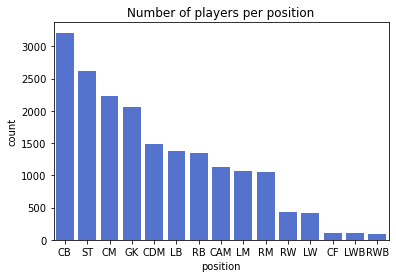

In [29]:
sb.countplot(data = df, x = 'position', order = df['position'].value_counts().index, palette=['royalblue'])
plt.title('Number of players per position');

According to our data, CB is the most played position.

In[60]:

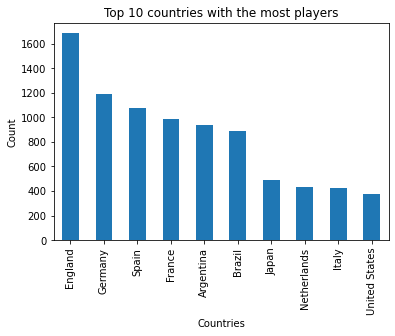

In [30]:
nationality_10 = df['nationality'].value_counts()[0:10]
plt.title('Top 10 countries with the most players')
plt.xlabel('Countries')
plt.ylabel('Count')
nationality_10.plot.bar();

Most players on FIFA 21 are English. This could be due to there being more English leagues in the game than any other nations.    

In[61]:

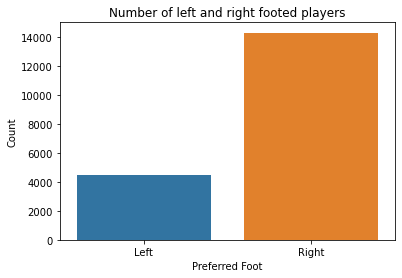

In [31]:
sb.countplot(data = df, x = 'preferred_foot')
plt.title('Number of left and right footed players')
plt.xlabel('Preferred Foot')
plt.ylabel('Count');

The majority of players are right footed.

In[62]:

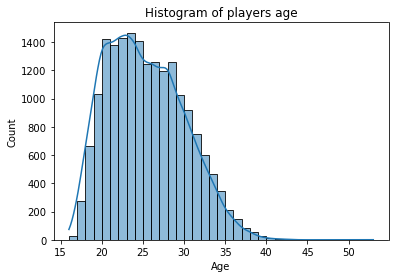

In [32]:
sb.histplot(df['age'], binwidth = 1, kde = True)
plt.title('Histogram of players age')
plt.xlabel('Age');

This distribution shows as slightly skewed to the right. Ther majority of the players are in their 20's.<br>


In[63]:

In [33]:
df.age.value_counts();

In[64]:

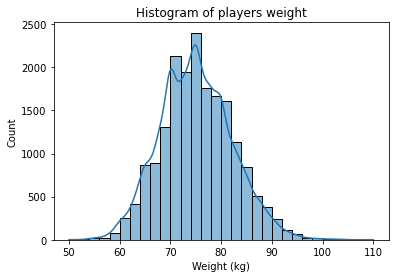

In [34]:
sb.histplot(df['weight_kg'], binwidth = 2, kde = True);
plt.title('Histogram of players weight')
plt.xlabel('Weight (kg)');

The distribution for the weight of players appears normally distributed, with the majority within 74-76kg.

In[65]:

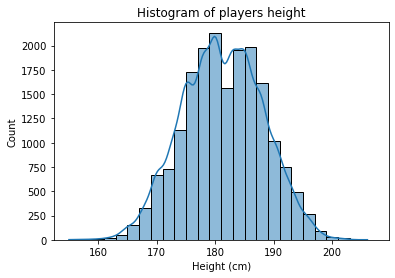

In [35]:
sb.histplot(df['height_cm'], binwidth = 2, kde = True);
plt.title('Histogram of players height')
plt.xlabel('Height (cm)');

Height also appears normally distributed.

In[66]:

In [36]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,1.871900e+04,18719.000000,18719.000000,18719.000000,...,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000
mean,226210.152198,25.177787,181.190074,75.006945,65.635023,71.089695,2.251555e+06,8780.135157,1.091832,2.935787,...,53.803943,48.018430,57.938672,47.552006,45.516320,16.415620,16.213046,16.076126,16.199583,16.527218
std,27192.890940,4.682187,6.819258,7.053984,7.003908,6.112693,5.127193e+06,19749.383757,0.362167,0.666895,...,13.710659,15.658848,12.103234,21.381018,20.927713,17.547823,16.811146,16.491500,16.982050,17.848455
min,41.000000,16.000000,155.000000,50.000000,47.000000,47.000000,0.000000e+00,500.000000,1.000000,1.000000,...,9.000000,6.000000,12.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210019.500000,21.000000,176.000000,70.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,...,45.000000,38.000000,50.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232285.000000,25.000000,181.000000,75.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,3.000000,...,55.000000,49.000000,59.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246719.500000,28.000000,186.000000,80.000000,70.000000,75.000000,1.800000e+06,8000.000000,1.000000,3.000000,...,64.000000,60.000000,66.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,53.000000,206.000000,110.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,5.000000,...,95.000000,92.000000,96.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?<br>
Both distributions for height and weight were both normally distributed. This is to be expected as if one is normally distributed, so should the other due to all players being professional footballers, being in good shaped.<br>
The distribution for height was slightly right skewed, which confirms what we saw with df.describe where the mean was greater the median for age.<br>
<br>
When looking at the number of players playing certain positions, we could see that CB in the most popular. This is likely due to the fact that there is at least 2 CB's in the starting 11 of a football team.<br>
Most players are English, and most players are right-footed.<br>
<br>
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?<br>
My data originally listed all the positions a player has played before, whereas I only wanted one positon per player. Therefore, I had to split up the positions and create a new column only containing the players primary position.<br>


## Bivariate Exploration<br>


In[67]:

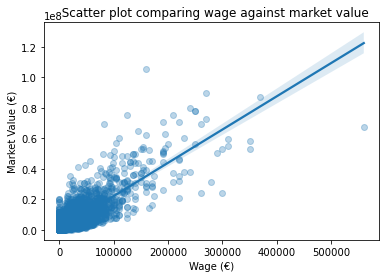

In [37]:
sb.regplot(data = df, x = 'wage_eur', y = 'value_eur', scatter_kws = {'alpha': 0.3})
plt.title('  Scatter plot comparing wage against market value')
plt.xlabel('Wage (€)')
plt.ylabel('Market Value (€)');
# Scatterplot between wage and value

Shows a fairly strong, positive correlation

In[86]:

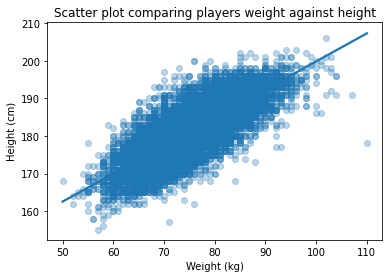

In [38]:
sb.regplot(data = df, x = 'weight_kg', y = 'height_cm', scatter_kws = {'alpha': 0.3})
plt.title('Scatter plot comparing players weight against height')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)');
#Scatterplot of weight against height

shows a weakly positive correlation 

In[69]:

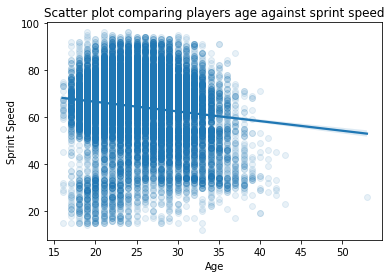

In [39]:
sb.regplot(data = df, x = 'age', y = 'movement_sprint_speed', scatter_kws = {'alpha': 0.1})
plt.title('Scatter plot comparing players age against sprint speed')
plt.xlabel('Age')
plt.ylabel('Sprint Speed');

catterplot of age against sprint speed

No real correlation between the two, very slightly negative

In[ ]:

In[ ]:

In[70]:

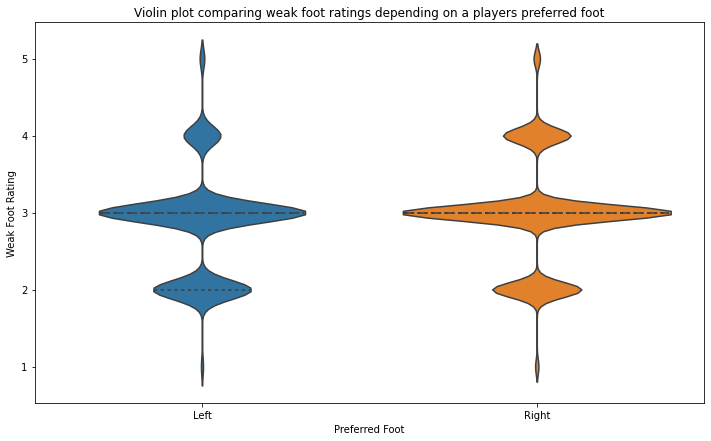

In [40]:
plt.figure(figsize = (12,7))
sb.violinplot(data = df, x = 'preferred_foot', y = 'weak_foot', inner = 'quartile');
plt.title('Violin plot comparing weak foot ratings depending on a players preferred foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Weak Foot Rating');

iolin plot comparing the weakfoot ratings of left and right footed players.  

2 very similar violin plots, with the majority of both right and left footed players have a weak foot rating of 3

In[71]:

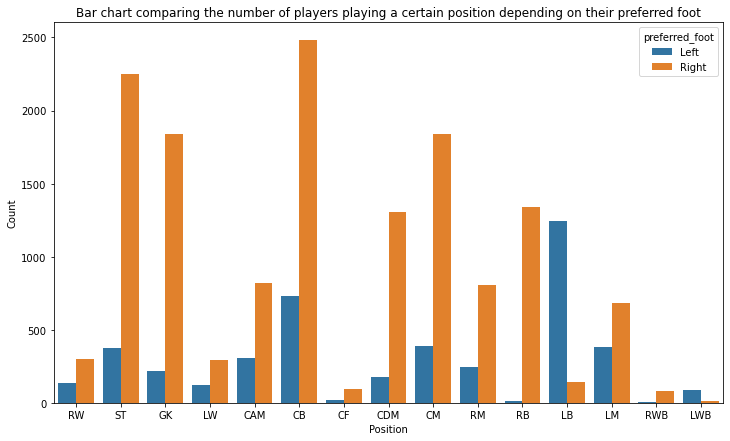

In [41]:
plt.figure(figsize=(12,7))
sb.countplot(data = df, x = 'position', hue = 'preferred_foot')
plt.title('Bar chart comparing the number of players playing a certain position depending on their preferred foot')
plt.xlabel('Position')
plt.ylabel('Count');

ar chart showing the preferred foot of players based on their positions

Most positions have more right footed players, but both LB and LWB have more left footed players than right footed players.

In[72]:

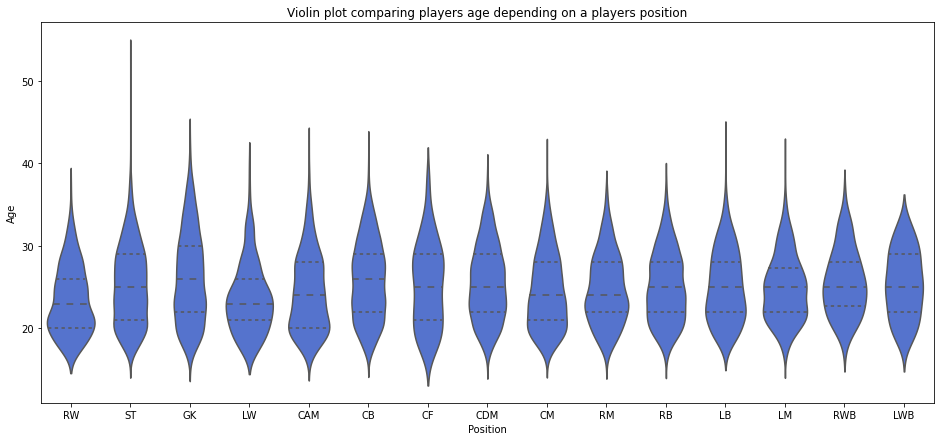

In [42]:
plt.figure(figsize = (16,7))
sb.violinplot(data = df, x = 'position', y = 'age', inner = 'quartile', palette=['royalblue']);
plt.title('Violin plot comparing players age depending on a players position')
plt.xlabel('Position')
plt.ylabel('Age');

iolin plot showing how the players ages range depending on what position they play.

The violin plot shows that Strikers have the largest age range, and the on average GK's and CB's are the oldest.

In[ ]:

In[73]:

In [43]:
def func(x_axis,y_axis):
    df_50 = df.groupby(x_axis, as_index=False).apply(lambda x: x.nlargest(50, y_axis))
    return((df_50.groupby(x_axis)[y_axis].sum().sort_values(ascending = False).head(10)).plot.bar())

creating a function to take the 50 highest rated value of certain variables.

In[74]:

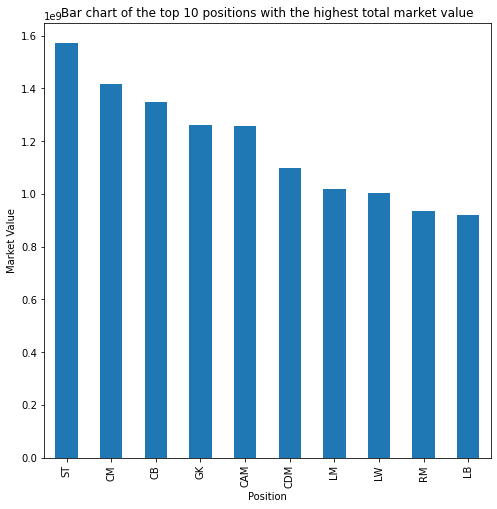

In [44]:
plt.figure(figsize = (8,8))
func('position', 'value_eur')
plt.title('Bar chart of the top 10 positions with the highest total market value')
plt.xlabel('Position')
plt.ylabel('Market Value');

We can see that the most valued position is striker. 

In[75]:

join all these 3 plots as a subplot

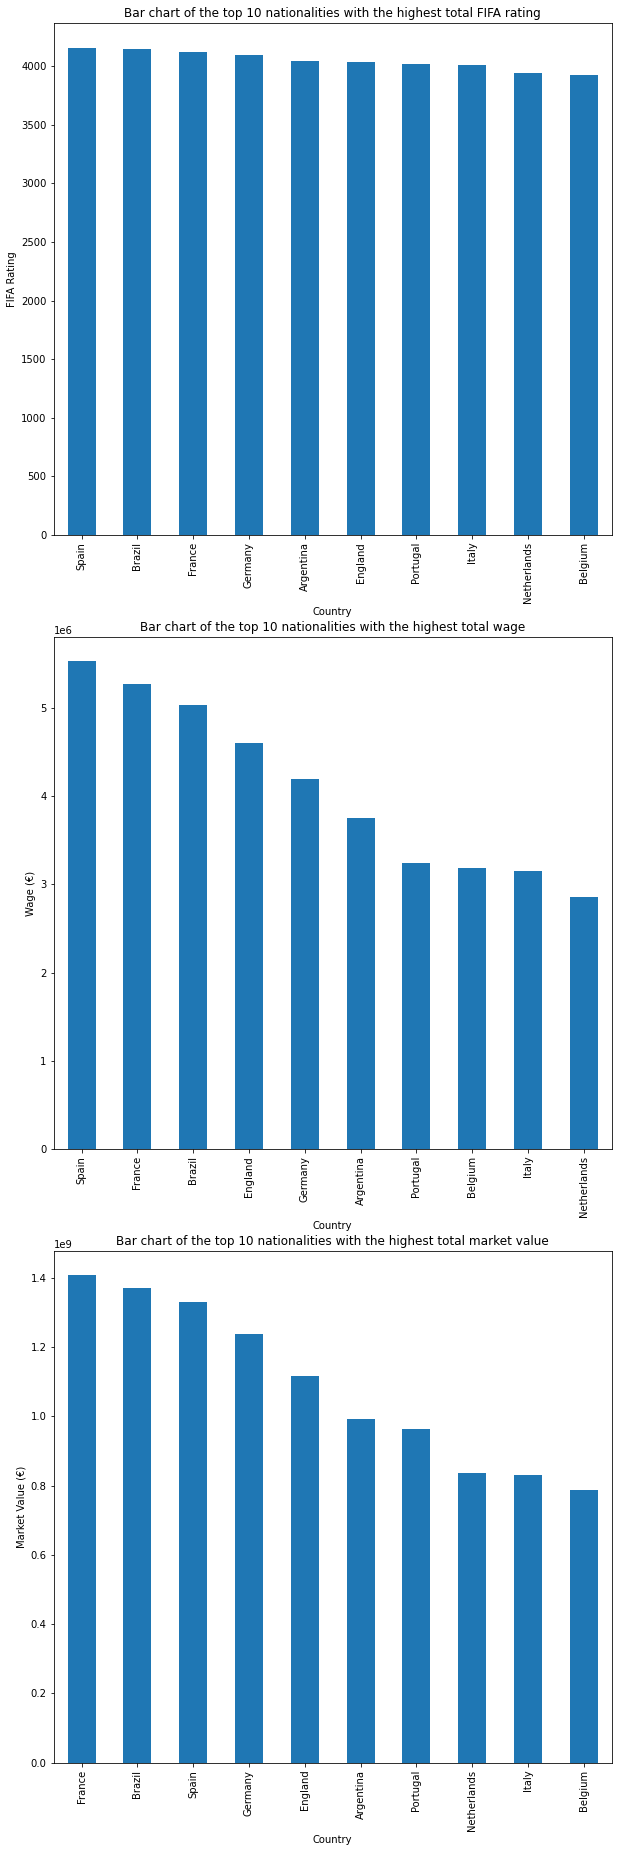

In [45]:
plt.figure(figsize = (10,32))
plt.subplot(3,1,1)
func('nationality','overall')
plt.title('Bar chart of the top 10 nationalities with the highest total FIFA rating')
plt.xlabel('Country')
plt.ylabel('FIFA Rating')
plt.subplot(3,1,2)
func('nationality','wage_eur')
plt.title('Bar chart of the top 10 nationalities with the highest total wage')
plt.xlabel('Country')
plt.ylabel('Wage (€)')
plt.subplot(3,1,3)
func('nationality','value_eur')
plt.title('Bar chart of the top 10 nationalities with the highest total market value')
plt.xlabel('Country')
plt.ylabel('Market Value (€)');

lotting bar charts for the top 10 nations whos top 50 players have the highest FIFA overall rating, wage and value.

Here we can see that the nation with the 50 highest overall ratings and wage is Spain. French players have the highest total market value.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?<br>
Firsty, I observed a fairly strong positive correlation between players wage and market.  <br>
There was a fairly weak positive correlation between players weight and height, which is a little surprising as the majority of football players have similar body compositions.<br>
When comparing age against sprint speed, we see a very, very weak negative correlation.<br>
<br>
For the violin plot comparing left and right footed players weak foot ability, we saw two very similar patterns with the majority of having a weak foot rating of 3. <br>
<br>
When comparing player positions against preferred foot, we could see that both left sided defensive positions have more left footed players than right, whereas all other positions favour right footed players.<br>
<br>
I then created 3 subplots, which compared the nations with the top 50 players with the highest FIFA overall rating, wage, and market value. The 10 nations for all 3 graphs were the same, and the highest nation for each category was Spain, Spain and France, respectively.<br>
<br>
<br>
<br>
<br>
<br>
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?<br>
<br>
When plotting a violin plot for position and age, we can see that GK's and CB's are the oldest, and strikers have the largest range as there is a 53 year old striker. 

## Multivariate Exploration<br>
<br>
> Create plots of three or more variables to investigate your data even<br>
further. Make sure that your investigations are justified, and follow from<br>
your work in the previous sections.

In[76]:

In [46]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,1.871900e+04,18719.000000,18719.000000,18719.000000,...,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000,18719.000000
mean,226210.152198,25.177787,181.190074,75.006945,65.635023,71.089695,2.251555e+06,8780.135157,1.091832,2.935787,...,53.803943,48.018430,57.938672,47.552006,45.516320,16.415620,16.213046,16.076126,16.199583,16.527218
std,27192.890940,4.682187,6.819258,7.053984,7.003908,6.112693,5.127193e+06,19749.383757,0.362167,0.666895,...,13.710659,15.658848,12.103234,21.381018,20.927713,17.547823,16.811146,16.491500,16.982050,17.848455
min,41.000000,16.000000,155.000000,50.000000,47.000000,47.000000,0.000000e+00,500.000000,1.000000,1.000000,...,9.000000,6.000000,12.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210019.500000,21.000000,176.000000,70.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,...,45.000000,38.000000,50.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232285.000000,25.000000,181.000000,75.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,3.000000,...,55.000000,49.000000,59.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246719.500000,28.000000,186.000000,80.000000,70.000000,75.000000,1.800000e+06,8000.000000,1.000000,3.000000,...,64.000000,60.000000,66.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,53.000000,206.000000,110.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,5.000000,...,95.000000,92.000000,96.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In[91]:

scatter plot with colour bar against value, wage and age 

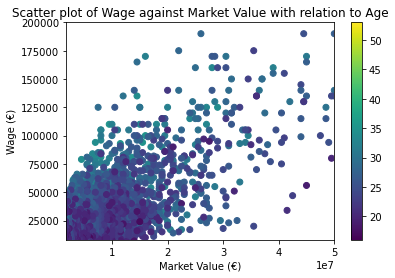

In [47]:
plt.scatter(data = df, x = 'value_eur', y = 'wage_eur', c = 'age')
plt.colorbar()
plt.xlim(1800000, 50000000)
plt.ylim(8000, 200000)
plt.title('Scatter plot of Wage against Market Value with relation to Age')
plt.xlabel('Market Value (€)')
plt.ylabel('Wage (€)');

We can see that generally, the younger players are the lower their market value and wage is. 

In[92]:

scatterplot with colouyr bar against speed, accel, and age

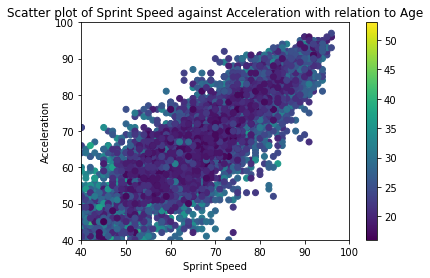

In [48]:
plt.scatter(data = df, x = 'movement_sprint_speed', y = 'movement_acceleration', c = 'age')
plt.colorbar()
plt.xlim(40, 100)
plt.ylim(40, 100)
plt.title('Scatter plot of Sprint Speed against Acceleration with relation to Age')
plt.xlabel('Sprint Speed')
plt.ylabel('Acceleration');

We can see the the older the player is lower their sprint speed and acceleration. The younger players dominate the middle values of the graph.

In[101]:

In [49]:
stats = ['movement_sprint_speed', 'attacking_finishing','skill_dribbling','skill_long_passing','defending_standing_tackle','wage_eur','value_eur']

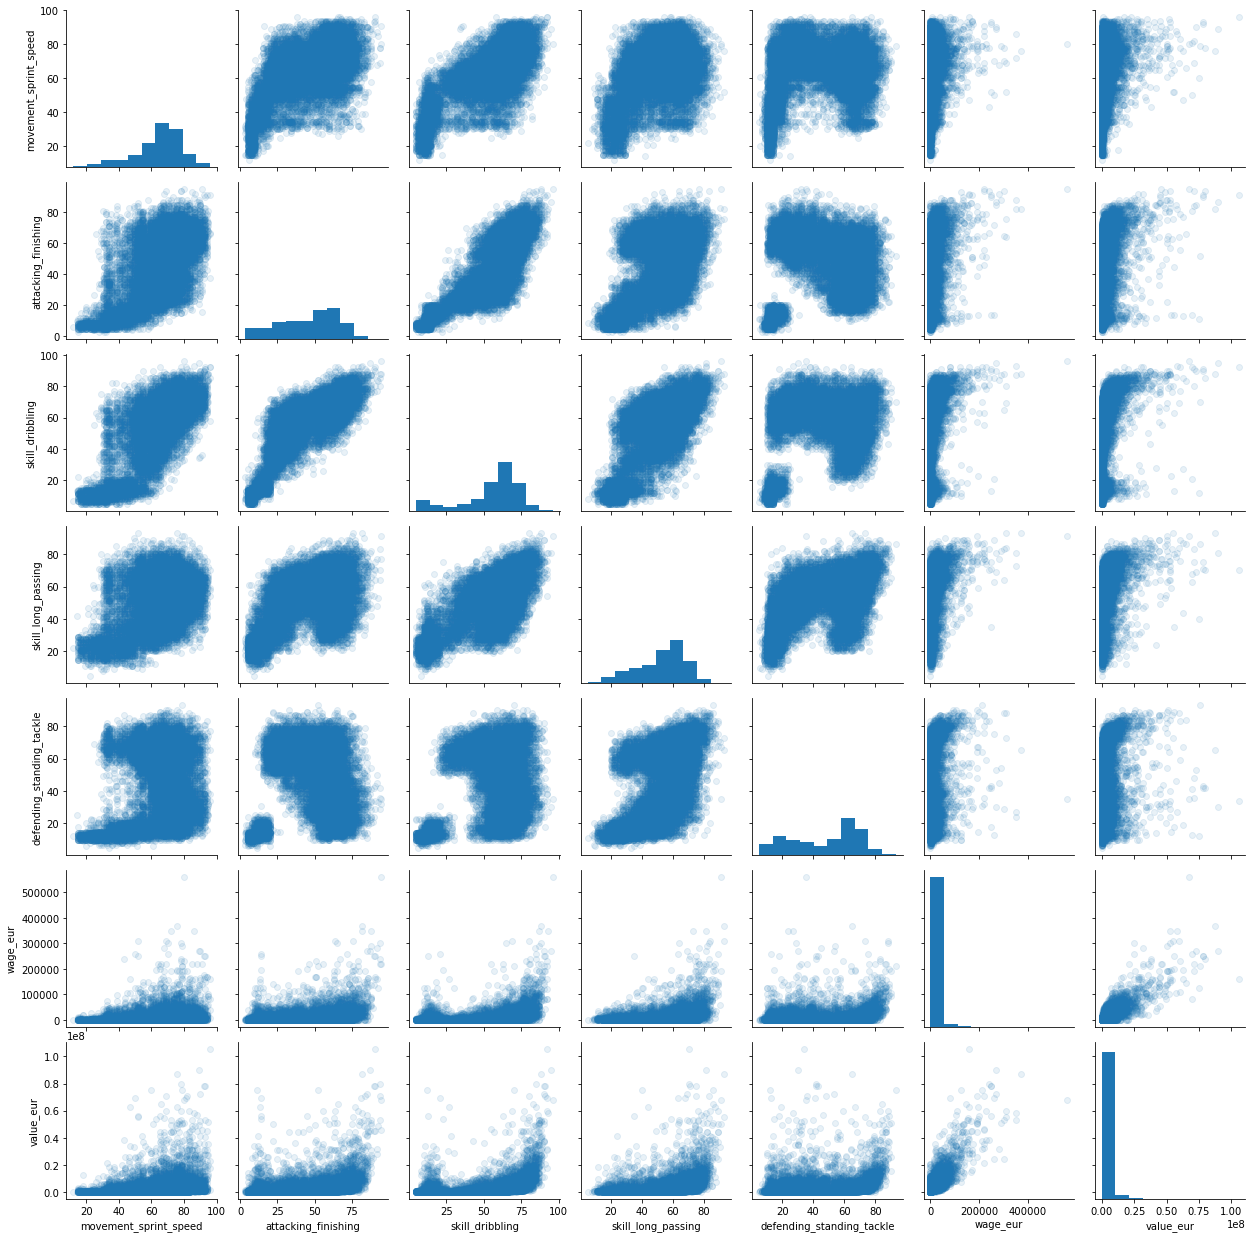

In [50]:
graph = sb.PairGrid(data = df, vars = stats)
graph.map_offdiag(plt.scatter, alpha = 0.1)
graph.map_diag(plt.hist);

In[95]:

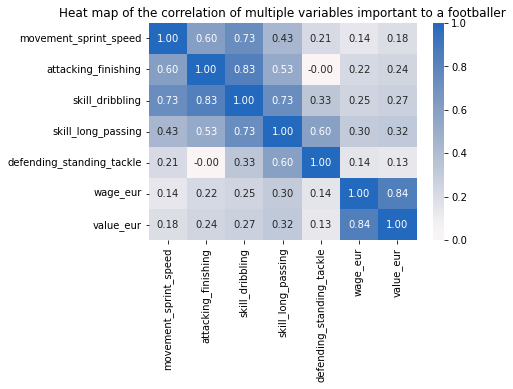

In [51]:
sb.heatmap(df[stats].corr(), annot = True, cmap = 'vlag_r', fmt = '.2f', center = 0)
plt.title('Heat map of the correlation of multiple variables important to a footballer'); 

We can see that the most valued skill is long passing, and that finishing and dribbling has the strongest correlation out of all the skills.

In[100]:

In [52]:
phys_stats = ['movement_sprint_speed', 'movement_acceleration','movement_agility','movement_reactions','movement_balance','age']

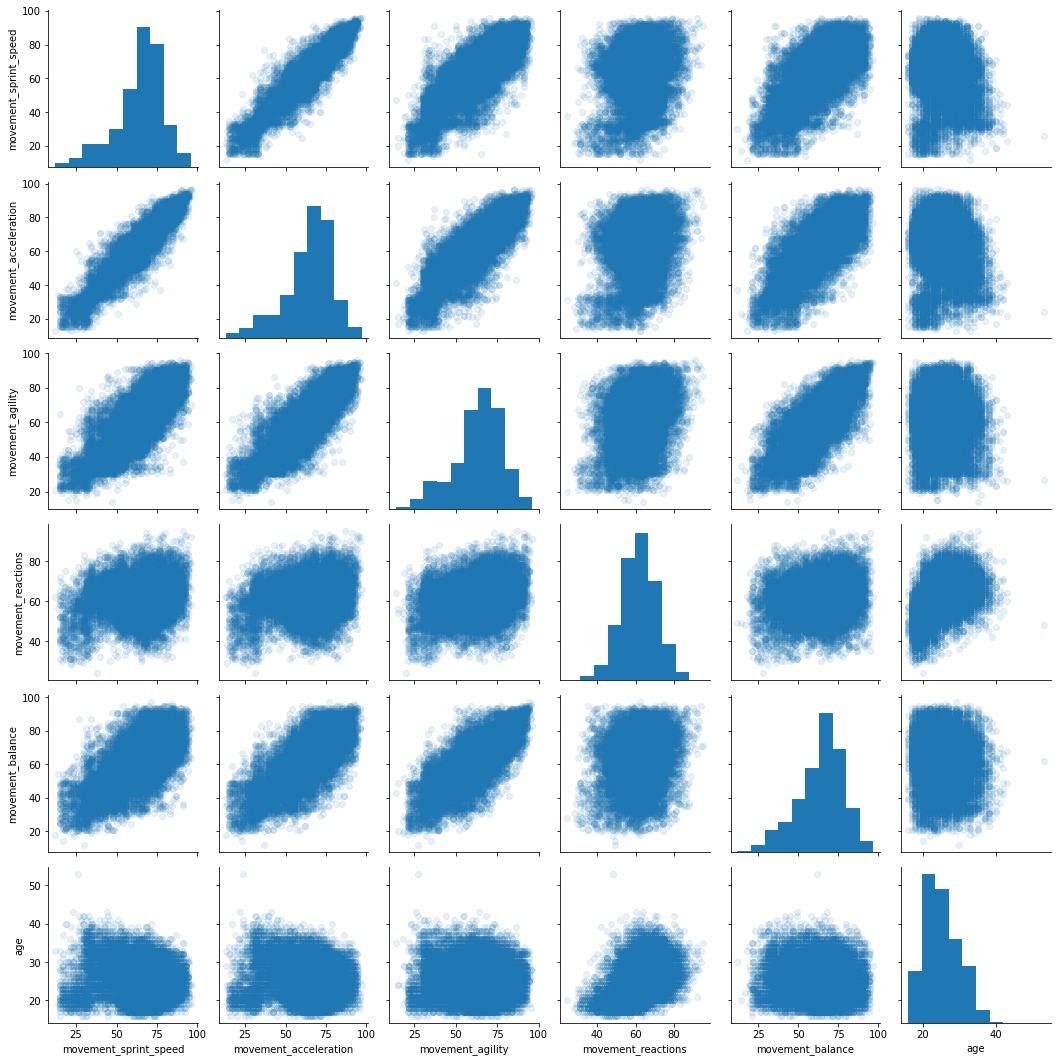

In [53]:
graph = sb.PairGrid(data = df, vars = phys_stats)
graph.map_offdiag(plt.scatter, alpha = 0.1)
graph.map_diag(plt.hist);

In[97]:

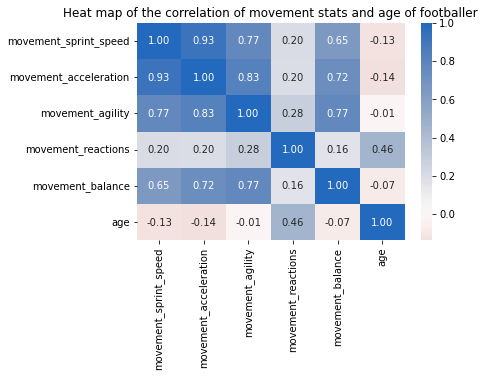

In [54]:
sb.heatmap(df[phys_stats].corr(), annot = True, cmap = 'vlag_r', fmt = '.2f', center = 0)
plt.title('Heat map of the correlation of movement stats and age of footballer'); 

We can see the all the movement stats are slightly negatively with age, except reactions. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?<br>
<br>
When comparing market value against wage with relation to age we could see that generally the younger the player the lower their market value and wage.<br>
When comparing sprint speed and acceleration with relation to age we could see that the slowest player are generally older, whilst the younger players tend to dominate the mid to higher speed and acceleration stats.<br>
<br>
The first matrix and heat plot was to compare how transferrable all the main football skills are, and what skills are valued most when compared against market value and wage. We can see that the most valued skill is long passing, and that finishing and dribbling has the strongest correlation out of all the skills.<br>
<br>
The second matrix and heat plot comparing age against movement stat, except reactions, has a slight negative correleation to age. These stats compared against each other are all strongly positively correlated also.<br>
<br>
### Were there any interesting or surprising interactions between features?<br>
<br>
I was surprised to see the finishing wasn't seen as the most valuable skill as we saw earlier that attackers strikers were the most valuable position.

## Conclusions<br>
<br>
Through my analysis, we can see that experience matters in relation to market value and salary as older players generally earn more and and have a higher market value than younger players.<br>
France, Brazil, Spain, England and Germany are the top 5 countries whose players have the highest market value and salary. <br>
Striker is the most valuable position, but the skill which has the strongest correlation to both player salary and market value is long passing.

<br>
> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML<br>
<br>
<br>
> At the end of your report, make sure that you export the notebook as an<br>
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep<br>
track of where the exported file goes, so you can put it in the same folder<br>
as this notebook for project submission. Also, make sure you remove all of<br>
the quote-formatted guide notes like this one before you finish your report!<br>
<br>


In[ ]:

In[ ]:

In[ ]: